In [1]:
#Necessary imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#np.random.seed(42)

In [2]:
#Function to generate X
def generate_x():
    X = [i for i in range(1,51)]
    return np.array(X)

In [3]:
#Funtion to generate an arbitary number
def get_arb_number():
    return np.random.uniform(low=-1,high=1)

In [4]:
#Function to generate Y
def generate_y(X):
    Y = [i+get_arb_number() for i in X]
    return np.array(Y)

In [5]:
#This can also be used to find the pseudo inverse of a matrix, manual calculation instead of pinv. (Tested and both 
#provide the same values)
# X_pseudo_inverse = np.matmul(X_new.transpose(),np.linalg.inv(np.matmul(X_new,X_new.transpose())))
# W = np.matmul(np.array(Y),X_pseudo_inverse)

In [6]:
#Function to generate weights
def get_weights(X,Y):
    X_new = np.array((np.ones_like(X),X))
    W = np.matmul(Y,np.linalg.pinv(X_new))
    return W

In [7]:
#Function to generate the line
def generate_line(X,W):
    y = [W[0] + W[1] * x for x in X] 
    return y

In [8]:
#Function to plot the Linear Least Square fit line
def plot(X,Y,y,type='pseudo_inverse'):
    fig,ax = plt.subplots(figsize=(12,12))
    _ = plt.scatter(X,Y)
    _ = plt.plot(X,y,color = 'black',label = 'Least Square Fit')
    if type == 'gradient':
        plt.title('Linear Least Squares Fit using Gradient Descent')
    else:
        plt.title('Linear Least Squares Fit using Matrix Pseudo Inverse')
    plt.xlabel('x')
    plt.ylabel('y')
    ax.legend()
    plt.show()
    return 

In [9]:
#Function to generate LLS using Matrix Pseudo Inverse
def lsfm():
    X = generate_x()
    Y = generate_y(X)
    W = get_weights(X,Y)
    y = generate_line(X,W)
    plot(X,Y,y)
    return X,Y,W

In [10]:
#Function to calculate gradient of the given function
def calc_gradient(X,Y,W):
    dE_dW0 = 0
    dE_dW1 = 0
    for i in range(len(X)):
        E = (Y[i] - (W[0] + W[1]*X[i]))
        dE_dW0+= (-2) * E
        dE_dW1+= (-2) * (X[i]) * E
    return np.array([dE_dW0,dE_dW1])

In [11]:
#Function to update weights
def update_weights(X,Y,W,eta):
    W = W - (eta * calc_gradient(X,Y,W))
    return W

In [12]:
#Function to calculate the Error at each iteration
def calc_error(X,Y,W):
    E = 0
    for i in range(len(X)):
        E+= (Y[i] - (W[0] - W[1] * X[i]))**2
    return E

In [13]:
#Function to implement LLS using Gradient Descent Method
def gradient_descent(X,Y,W,eta,threshold):
    errors = []
    error_rate = 1
    epoch = 1
    error = calc_error(X,Y,W)
    errors.append(error)
    while error_rate >= threshold and epoch <= 500:
        error = calc_error(X,Y,W)
        W = update_weights(X,Y,W,eta)
        updated_error = calc_error(X,Y,W)
        errors.append(updated_error)
        error_rate = abs(updated_error-error)
        if epoch % 100 == 0:
            print('epoch:',epoch)
            print('Error before weight update: {}'.format(error))
            print('Updated Weights are : {}'.format(W))
            print('Error after weight update: {}'.format(updated_error))
            print('Change in Error: {}'.format(error_rate))
            print('-' * 50)
        epoch+=1
    return W

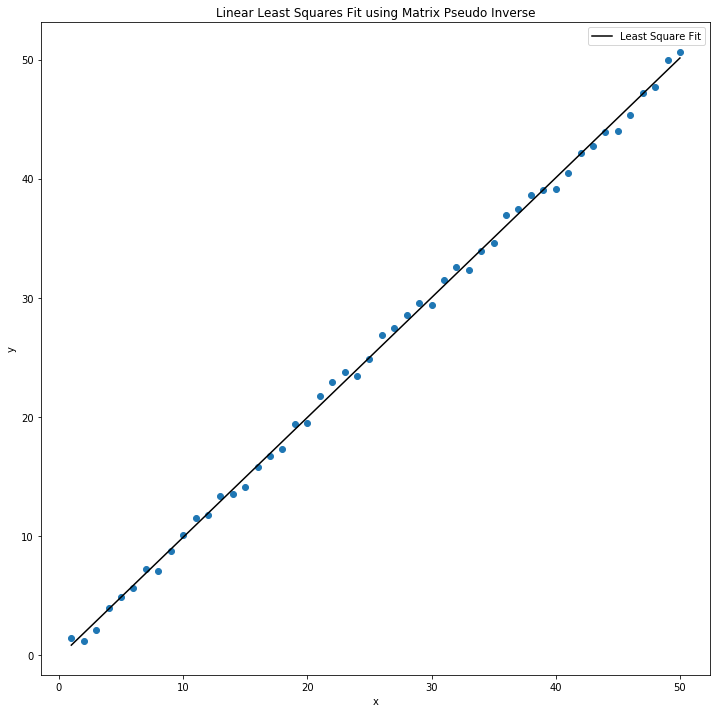

Final Weights: [-0.15387788  1.0057522 ]


In [14]:
X,Y,W = lsfm()
print('Final Weights: {}'.format(W))

epoch: 100
Error before weight update: 174444.34501559008
Updated Weights are : [-0.22663451  1.0079139 ]
Error after weight update: 174444.16363161165
Change in Error: 0.1813839784299489
--------------------------------------------------
epoch: 200
Error before weight update: 174426.4230004948
Updated Weights are : [-0.22489217  1.00786213]
Error after weight update: 174426.2459700407
Change in Error: 0.17703045409871265
--------------------------------------------------
epoch: 300
Error before weight update: 174408.93113280807
Updated Weights are : [-0.22319155  1.0078116 ]
Error after weight update: 174408.7583511574
Change in Error: 0.1727816506754607
--------------------------------------------------
epoch: 400
Error before weight update: 174391.8590661775
Updated Weights are : [-0.22153165  1.00776228]
Error after weight update: 174391.69043113905
Change in Error: 0.16863503845524974
--------------------------------------------------
epoch: 500
Error before weight update: 174375.

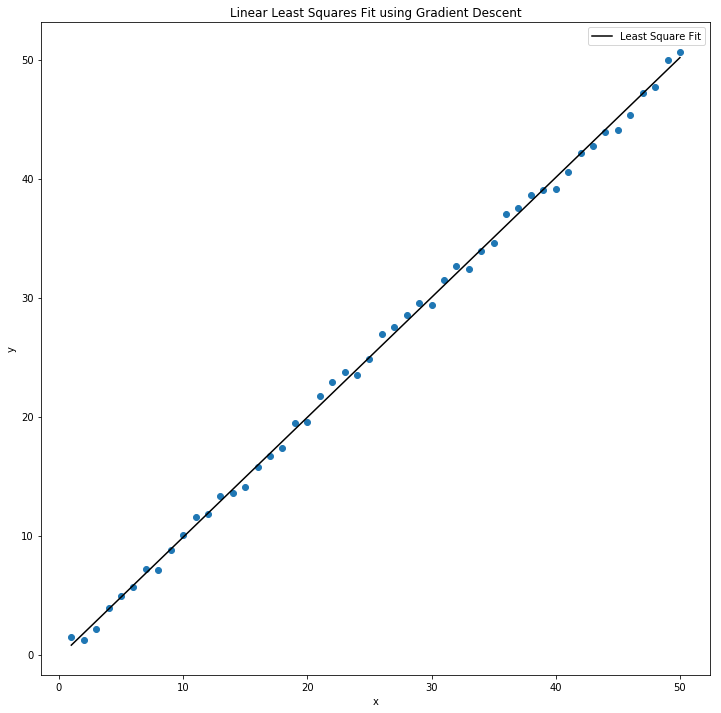

Final Weights: [-0.21991151  1.00771415]


In [15]:
W = np.array([get_arb_number(),get_arb_number()])
eta = 0.00001
threshold = 0.1
W_final = gradient_descent(X,Y,W,eta,threshold)
print('\n\nLearning Rate: {}'.format(eta))
print('Initial Weights: {}'.format(W))
y = generate_line(X,W_final)
plot(X,Y,y,'gradient')
print('Final Weights: {}'.format(W_final))

2(f): Using the Gradient Descent method, with the learning rate of 0.00001, it takes a lot of time to converge and may not lead to global minima, because of this the number of iterations was limited to 500. The final weights are different with Matrix Pseudo Inverse method and Gradient method.